# Importing Libraries and Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings      
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
import datetime
from pylab import rcParams
from fbprophet import Prophet

# Importing Datasets

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/train_sales.csv')
data_test = pd.read_csv('/content/drive/MyDrive/test_sales.csv')
data_sample = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

# Basic checks in the Train Dataset

In [ ]:
# First 5 rows

data_train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
# Last 5 rows

data_train.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [ ]:
# Columns in dataset

data_train.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [ ]:
# Shape of data

data_train.shape

(913000, 4)

In [ ]:
# Checking missing values

data_train.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
# Checking datatypes

data_train.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [ ]:
# Checking dataset info

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
# Converting date in train dataset to datetime format

data_train['date'] = pd.to_datetime(data_train['date'], format = "%Y-%m-%d")
data_train.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [ ]:
# Taking the train data for store = 1 and item = 1

stritem1 = data_train.loc[(data_train['store'] == 1) & (data_train['item'] == 1)]

In [ ]:
# Checking the max and min values of date field in train dataset

stritem1['date'].max(), stritem1['date'].min()

(Timestamp('2017-12-31 00:00:00'), Timestamp('2013-01-01 00:00:00'))

In [ ]:
# Sorting values in train dataset based on date

stritem1 = stritem1.sort_values('date')
storeitem = stritem1

In [ ]:
# Displaying details in train dataset for store = 1 and item = 1

stritem1

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
1821,2017-12-27,1,1,14
1822,2017-12-28,1,1,19
1823,2017-12-29,1,1,15
1824,2017-12-30,1,1,27


In [ ]:
# Finding sum of sales after groupby date in train dataset

stritem1 = stritem1.groupby('date')['sales'].sum().reset_index()

In [ ]:
# Setting index of train dataset to date field

stritem1 = stritem1.set_index('date')
stritem1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=1826, freq=None)

date
2017-01-01    15.645161
2017-02-01    17.392857
2017-03-01    18.096774
2017-04-01    22.566667
2017-05-01    24.935484
2017-06-01    28.333333
2017-07-01    28.161290
2017-08-01    25.612903
2017-09-01    24.533333
2017-10-01    21.290323
2017-11-01    22.266667
2017-12-01    17.193548
Freq: MS, Name: sales, dtype: float64


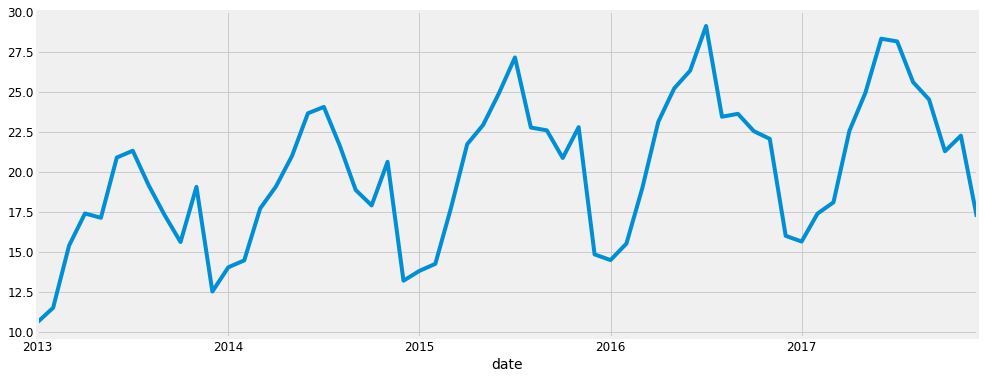

In [ ]:
# Plotting mean of sales for each month

y = stritem1['sales'].resample('MS').mean()
print(y['2017':])
y.plot(figsize = (15, 6))
plt.show()

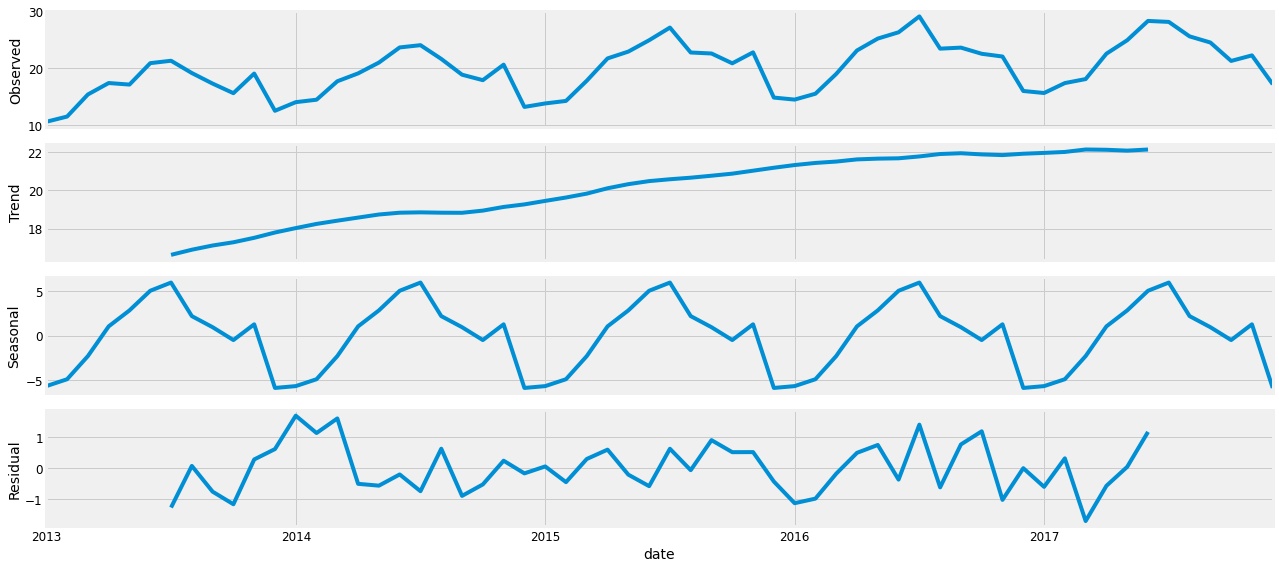

In [ ]:
# Plotting observed, residuals, seasonals and trends using rc Params

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [ ]:
# Setting parameter combinations for Seasonal ARIMA

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list (itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'. format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'. format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'. format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'. format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
# Checking parameter combinations for Seasonal ARIMA

for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationarity = False, enforce_invertibility = False)
      predict = model.fit()
      print('ARIMA {} x {} 12 - AIC: {}'. format(param, param_seasonal, predict.aic))
    except:
      continue

ARIMA (0, 0, 0) x (0, 0, 0, 12) 12 - AIC: 526.2351928268367
ARIMA (0, 0, 0) x (0, 0, 1, 12) 12 - AIC: 387.5719203827
ARIMA (0, 0, 0) x (0, 1, 0, 12) 12 - AIC: 192.8741621602306


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (0, 0, 0) x (0, 1, 1, 12) 12 - AIC: 1357.8313900284843
ARIMA (0, 0, 0) x (1, 0, 0, 12) 12 - AIC: 168.776589412485
ARIMA (0, 0, 0) x (1, 0, 1, 12) 12 - AIC: 163.96888514709568
ARIMA (0, 0, 0) x (1, 1, 0, 12) 12 - AIC: 125.85326363134038


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (0, 0, 0) x (1, 1, 1, 12) 12 - AIC: 1521.1052062674908
ARIMA (0, 0, 1) x (0, 0, 0, 12) 12 - AIC: 455.8698594091882
ARIMA (0, 0, 1) x (0, 0, 1, 12) 12 - AIC: 331.3391537733607
ARIMA (0, 0, 1) x (0, 1, 0, 12) 12 - AIC: 173.16063029855025


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (0, 0, 1) x (0, 1, 1, 12) 12 - AIC: 1370.3110472696626


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (0, 0, 1) x (1, 0, 0, 12) 12 - AIC: 171.5307956630168


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (0, 0, 1) x (1, 0, 1, 12) 12 - AIC: 160.7104877124082
ARIMA (0, 0, 1) x (1, 1, 0, 12) 12 - AIC: 126.84718784481971


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (0, 0, 1) x (1, 1, 1, 12) 12 - AIC: 1433.4857772177738
ARIMA (0, 1, 0) x (0, 0, 0, 12) 12 - AIC: 295.02929693570036
ARIMA (0, 1, 0) x (0, 0, 1, 12) 12 - AIC: 206.4791394269849
ARIMA (0, 1, 0) x (0, 1, 0, 12) 12 - AIC: 163.28203334483916


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (0, 1, 0) x (0, 1, 1, 12) 12 - AIC: 1437.8420044548718
ARIMA (0, 1, 0) x (1, 0, 0, 12) 12 - AIC: 164.4341113109207
ARIMA (0, 1, 0) x (1, 0, 1, 12) 12 - AIC: 163.50012724729194
ARIMA (0, 1, 0) x (1, 1, 0, 12) 12 - AIC: 131.43036057056395


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (0, 1, 0) x (1, 1, 1, 12) 12 - AIC: 1279.324198579564
ARIMA (0, 1, 1) x (0, 0, 0, 12) 12 - AIC: 291.28555964292735
ARIMA (0, 1, 1) x (0, 0, 1, 12) 12 - AIC: 203.61035836162512
ARIMA (0, 1, 1) x (0, 1, 0, 12) 12 - AIC: 144.40719166556042


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (0, 1, 1) x (0, 1, 1, 12) 12 - AIC: 1416.8521418653959
ARIMA (0, 1, 1) x (1, 0, 0, 12) 12 - AIC: 151.7923367158809
ARIMA (0, 1, 1) x (1, 0, 1, 12) 12 - AIC: 148.15767823664254
ARIMA (0, 1, 1) x (1, 1, 0, 12) 12 - AIC: 115.73915245574209


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (0, 1, 1) x (1, 1, 1, 12) 12 - AIC: 1415.4845537110396
ARIMA (1, 0, 0) x (0, 0, 0, 12) 12 - AIC: 301.0309231480609
ARIMA (1, 0, 0) x (0, 0, 1, 12) 12 - AIC: 212.02114470925724
ARIMA (1, 0, 0) x (0, 1, 0, 12) 12 - AIC: 159.43973741197706


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (1, 0, 0) x (0, 1, 1, 12) 12 - AIC: 1318.35945350178
ARIMA (1, 0, 0) x (1, 0, 0, 12) 12 - AIC: 155.40231936552266
ARIMA (1, 0, 0) x (1, 0, 1, 12) 12 - AIC: 157.38562623602246
ARIMA (1, 0, 0) x (1, 1, 0, 12) 12 - AIC: 122.1836295859935


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (1, 0, 0) x (1, 1, 1, 12) 12 - AIC: 1383.3335629254561
ARIMA (1, 0, 1) x (0, 0, 0, 12) 12 - AIC: 298.82669352318374
ARIMA (1, 0, 1) x (0, 0, 1, 12) 12 - AIC: 210.7867314827049


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (1, 0, 1) x (0, 1, 0, 12) 12 - AIC: 145.45629463253286


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (1, 0, 1) x (0, 1, 1, 12) 12 - AIC: 1350.0429614497498
ARIMA (1, 0, 1) x (1, 0, 0, 12) 12 - AIC: 148.9141545613969
ARIMA (1, 0, 1) x (1, 0, 1, 12) 12 - AIC: 148.79052687547883
ARIMA (1, 0, 1) x (1, 1, 0, 12) 12 - AIC: 114.86411922450844


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (1, 0, 1) x (1, 1, 1, 12) 12 - AIC: 1413.2130542507643
ARIMA (1, 1, 0) x (0, 0, 0, 12) 12 - AIC: 296.951797038932
ARIMA (1, 1, 0) x (0, 0, 1, 12) 12 - AIC: 208.4584912683699
ARIMA (1, 1, 0) x (0, 1, 0, 12) 12 - AIC: 152.8661315493766


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (1, 1, 0) x (0, 1, 1, 12) 12 - AIC: 1497.2565536458117
ARIMA (1, 1, 0) x (1, 0, 0, 12) 12 - AIC: 154.21164957199113
ARIMA (1, 1, 0) x (1, 0, 1, 12) 12 - AIC: 156.1867345250842
ARIMA (1, 1, 0) x (1, 1, 0, 12) 12 - AIC: 120.60899337975187


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (1, 1, 0) x (1, 1, 1, 12) 12 - AIC: 1495.784482476853
ARIMA (1, 1, 1) x (0, 0, 0, 12) 12 - AIC: 290.55003713878887
ARIMA (1, 1, 1) x (0, 0, 1, 12) 12 - AIC: 205.09340251787128
ARIMA (1, 1, 1) x (0, 1, 0, 12) 12 - AIC: 146.38810400179622


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (1, 1, 1) x (0, 1, 1, 12) 12 - AIC: 1288.0323344638255
ARIMA (1, 1, 1) x (1, 0, 0, 12) 12 - AIC: 150.9889589409951
ARIMA (1, 1, 1) x (1, 0, 1, 12) 12 - AIC: 150.15759874646128
ARIMA (1, 1, 1) x (1, 1, 0, 12) 12 - AIC: 112.91676801283712
ARIMA (1, 1, 1) x (1, 1, 1, 12) 12 - AIC: 1286.6600956568636


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       3.476e-05      0.237      0.000      1.000      -0.465       0.465
ma.L1         -0.8558      0.108     -7.897      0.000      -1.068      -0.643
ar.S.L12   -5.628e-06      0.015     -0.000      1.000      -0.030       0.029
sigma2         1.2814      0.435      2.946      0.003       0.429       2.134


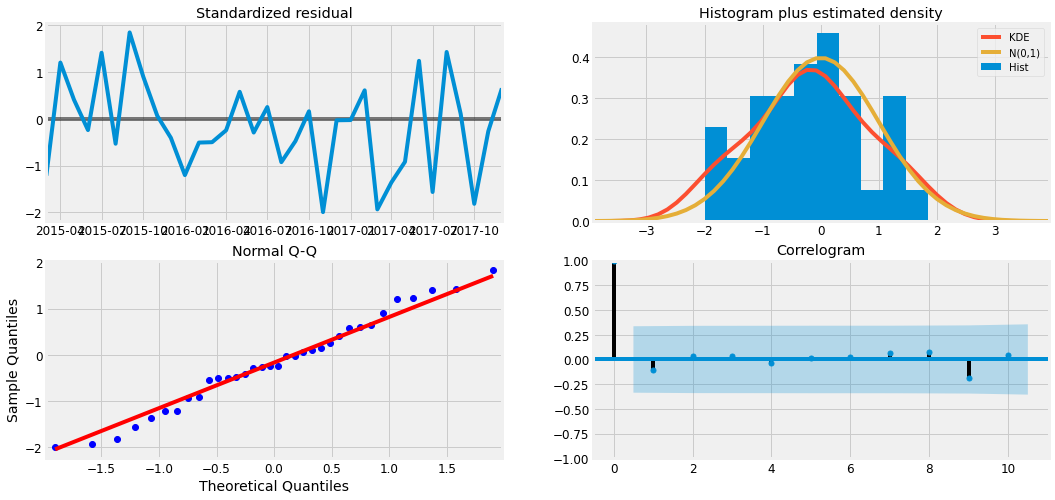

In [ ]:
# Lowest AIC value is 112.91. Building model with ARIMA (1, 1, 1) x (1, 1, 0, 12)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1), seasonal_order = (1, 1, 0, 12), 
                                  enforce_stationarity = False, enforce_invertibility = False)
predict = model.fit()
print(predict.summary().tables[1])
predict.plot_diagnostics(figsize = (16, 8))
plt.show()

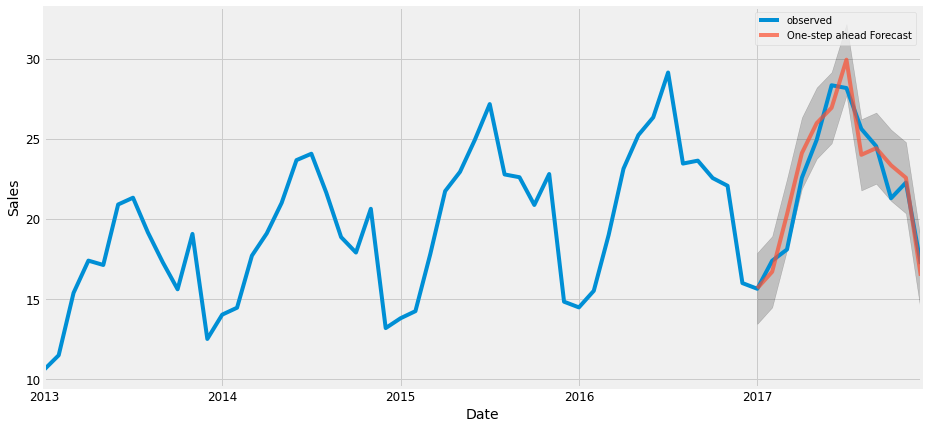

In [ ]:
# One step ahead forecasting  

predictions = predict.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
predictions_ci = predictions.conf_int()
ax = y['2013':].plot(label = 'observed')
predictions.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(predictions_ci.index, predictions_ci.iloc[:, 0], predictions_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
# Checking lower and upper values for each month

predictions_ci

,lower sales,upper sales
date,,
2017-01-01,13.456682,17.893951
2017-02-01,14.485700,18.922967
2017-03-01,18.067802,22.505067
2017-04-01,21.885189,26.322453
2017-05-01,23.755942,28.193205
2017-06-01,24.713600,29.150863
2017-07-01,27.711477,32.148740
2017-08-01,21.778820,26.216082
2017-09-01,22.193667,26.630929


In [ ]:
# Checking Mean Squared Error and Root Mean Squared Error with predicted mean and the original values

y_predict = predictions.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_predict - y_truth) ** 2).mean()
print('The MSE of forecasts is {}'. format(round(mse, 2)))
print('The RMSE of forecasts is {}'. format(round(np.sqrt(mse), 2)))

The MSE of forecasts is 1.77
The RMSE of forecasts is 1.33


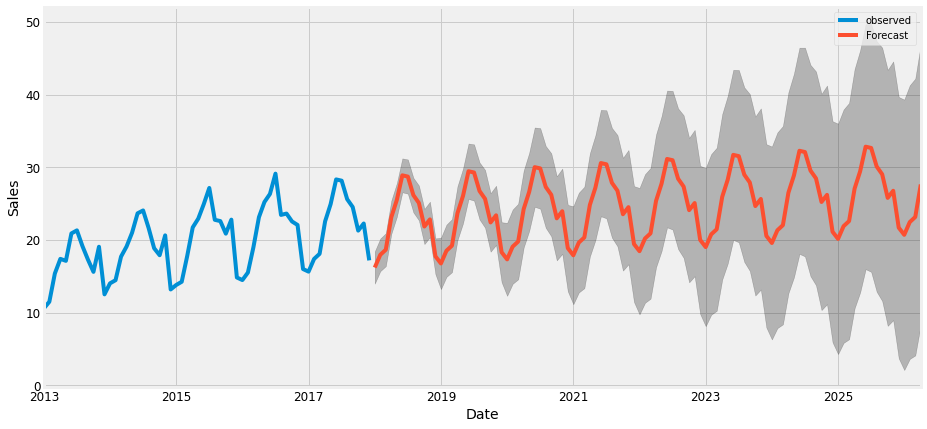

In [ ]:
# Forecasting for steps = 100 and plotting the forecasts

predictions_uc = predict.get_forecast(steps = 100)
predictions_ci = predictions_uc.conf_int()
ax = y.plot(label = 'observed', figsize = (14, 7))
predictions_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(predictions_ci.index, predictions_ci.iloc[:, 0], predictions_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
# The model which was build earlier was for a month. But the predictions needs to be done for days. 
# Creating a new model to predict day wise sales for 3 months
# For store = 1 and item = 1

y1 = stritem1['sales']
model1 = sm.tsa.statespace.SARIMAX(y1, order = (1, 1, 1), seasonal_order = (1, 1, 0, 12), enforce_stationarity = False, 
                                   enforce_invertibility = False, freq = 'D')
predict1 = model1.fit()
prediction_new = predict1.forecast(steps = 90)

In [ ]:
# Displaying predicted values

prediction_new

2018-01-01    18.350087
2018-01-02    19.345064
2018-01-03    12.625137
2018-01-04    19.002447
2018-01-05    16.275370
                ...    
2018-03-27    17.321539
2018-03-28    10.831189
2018-03-29    19.001514
2018-03-30    17.462962
2018-03-31    14.629176
Freq: D, Length: 90, dtype: float64

In [ ]:
# Setting index of train dataset to date field

data_train = data_train.set_index('date')
data_train.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=913000, freq=None)

In [ ]:
# Displaying train data set

data_train

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


In [ ]:
# Generating output for all stores and items using For loop

i = 1                                                                                                          # variable for store loop
j = 1                                                                                                          # variable for item loop
k = 0                                                                                                          # variable for storing predictions to list
getpred = []                                                                                                   # list for storing predicted values

for i in range (1, 11):                                                                                        # For loop for stores
  for j in range (1, 51):                                                                                      # For loop for items
    stritem1 = data_train.loc[(data_train['store'] == i) & (data_train['item'] == j)]                          # Taking values for selected store and item
    y1 = stritem1['sales']                                                                                     # Variable for which prediction to be done
    model1 = sm.tsa.statespace.SARIMAX(y1, order = (1, 1, 1), seasonal_order = (1, 1, 0, 12),                  # creating model
                                       enforce_stationarity = False, enforce_invertibility = False, freq = 'D')
    predict1 = model1.fit()                                                                                    # fitting model
    prediction_new = predict1.forecast(steps = 90)                                                             # Forecasting for 90 days
    for k in range (0, 90):                                                                                    # For loop for storing predictions to list
      getpred.append(prediction_new[k])                                                                        # Storing values to list

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
# Checking columns in sample file

data_sample.columns

Index(['id', 'sales'], dtype='object')

In [ ]:
# Passing values to output file field

data_sample['sales'] = getpred

In [ ]:
# creating csv file for submission

data_sample.to_csv('submission_arima.csv', index = False)

In [ ]:
# Using Prophet to develop a forecasting system

storeitem = storeitem.rename(columns = {'date': 'ds', 'sales': 'y'})
stritem_model = Prophet(interval_width = 0.95)
stritem_model.fit(storeitem)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Making forecast with the model - monthly

data_forecast = stritem_model.make_future_dataframe(periods = 36, freq = 'MS')
data_forecast = stritem_model.predict(data_forecast)

In [ ]:
# Displaying predicted results

data_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,15.751015,-0.859905,17.344696,15.751015,15.751015,-7.101941,-7.101941,-7.101941,-1.787023,-1.787023,-1.787023,-5.314918,-5.314918,-5.314918,0.0,0.0,0.0,8.649074
1,2013-01-02,15.756475,0.944100,18.486166,15.756475,15.756475,-6.447920,-6.447920,-6.447920,-1.166588,-1.166588,-1.166588,-5.281332,-5.281332,-5.281332,0.0,0.0,0.0,9.308555
2,2013-01-03,15.761934,0.225101,18.047137,15.761934,15.761934,-5.776445,-5.776445,-5.776445,-0.511676,-0.511676,-0.511676,-5.264769,-5.264769,-5.264769,0.0,0.0,0.0,9.985490
3,2013-01-04,15.767394,3.298096,19.873415,15.767394,15.767394,-4.217538,-4.217538,-4.217538,1.047113,1.047113,1.047113,-5.264652,-5.264652,-5.264652,0.0,0.0,0.0,11.549855
4,2013-01-05,15.772853,5.341609,22.059631,15.772853,15.772853,-2.279503,-2.279503,-2.279503,3.000399,3.000399,3.000399,-5.279903,-5.279903,-5.279903,0.0,0.0,0.0,13.493350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,2020-08-01,24.498454,22.849914,40.958595,23.686262,25.328840,7.324551,7.324551,7.324551,3.000399,3.000399,3.000399,4.324152,4.324152,4.324152,0.0,0.0,0.0,31.823005
1858,2020-09-01,24.557169,16.837521,33.710156,23.700537,25.408238,0.436926,0.436926,0.436926,-1.787023,-1.787023,-1.787023,2.223950,2.223950,2.223950,0.0,0.0,0.0,24.994095
1859,2020-10-01,24.613990,14.512053,31.569718,23.722108,25.508557,-1.087365,-1.087365,-1.087365,-0.511676,-0.511676,-0.511676,-0.575689,-0.575689,-0.575689,0.0,0.0,0.0,23.526624
1860,2020-11-01,24.672704,19.145434,37.214666,23.747421,25.616684,3.511626,3.511626,3.511626,3.820026,3.820026,3.820026,-0.308401,-0.308401,-0.308401,0.0,0.0,0.0,28.184330


Text(0.5, 1.0, 'Sales')

<Figure size 1296x432 with 0 Axes>

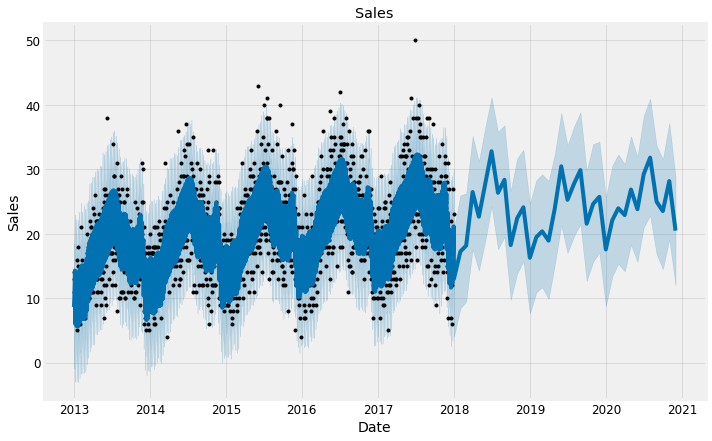

In [ ]:
# Plotting the predictions

plt.figure(figsize = (18, 6))
stritem_model.plot(data_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Sales')